<a href="https://colab.research.google.com/github/AlbionKransiqi/Car-Classification-Deep-Learning/blob/main/IL181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical DataScience - Project**

## **Purpose**

## **Methodology**

## **Discussion and Results**

## Setup
### Library import

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow

### Data Import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## loading the data
train_car = glob("/content/drive/My Drive/Colab Notebooks/car_train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_test/*/*")

In [10]:
## loading the data
train_car = sorted(glob("/content/drive/My Drive/Colab Notebooks/car_data_2/train/*/*"))
test_car = sorted(glob("/content/drive/My Drive/Colab Notebooks/car_data_2/test/*/*"))

### Data Exploration

In [11]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  #car_class = car.replace("/","").replace("\\","")[48::][:-9]
  car_class = car.replace("/","").replace("\\","")[50::][:-9]
  #car_class = car.replace("/","").replace("\\","")[44::][:-9]
  return car_class

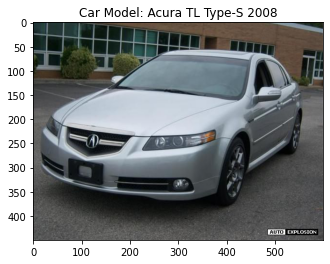

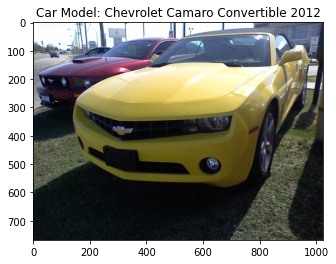

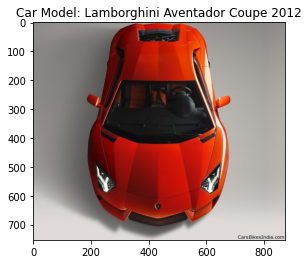

In [15]:
## showing some car images and their classes
for i in range(1,800,400):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [13]:
def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  ## car_class = car.replace("/","").replace("\\","")[47::][:-9]
  car_class = car.replace("/","").replace("\\","")[49::][:-9]
  return car_class

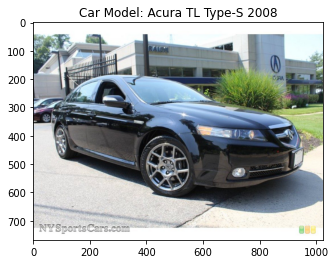

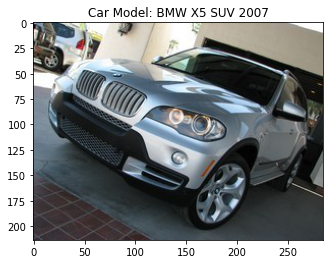

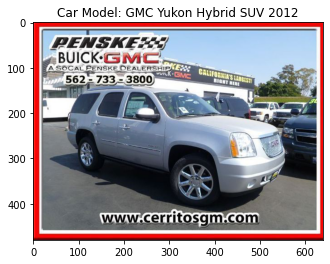

In [16]:
## showing some car images and their classes
for i in range(1,500,200):
    image = Image.open(test_car[i])
    label = get_test_car_class(test_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [17]:
y_train = []
y_test = []

for i in range(len(train_car)): 
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    y_test.append(get_test_car_class(test_car[i]))

In [18]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels

,Cars,Make,Year
0,Acura TL Type-S 2008,Acura,2008
1,Acura TL Type-S 2008,Acura,2008
2,Acura TL Type-S 2008,Acura,2008
3,Acura TL Type-S 2008,Acura,2008
4,Acura TL Type-S 2008,Acura,2008
...,...,...,...
884,Volkswagen Golf Hatchback 2012,Volkswagen,2012
885,Volkswagen Golf Hatchback 2012,Volkswagen,2012
886,Volkswagen Golf Hatchback 2012,Volkswagen,2012
887,Volkswagen Golf Hatchback 2012,Volkswagen,2012


In [19]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]
df_test_labels

,Cars,Make,Year
0,Acura TL Type-S 2008,Acura,2008
1,Acura TL Type-S 2008,Acura,2008
2,Acura TL Type-S 2008,Acura,2008
3,Acura TL Type-S 2008,Acura,2008
4,Acura TL Type-S 2008,Acura,2008
...,...,...,...
872,Volkswagen Golf Hatchback 2012,Volkswagen,2012
873,Volkswagen Golf Hatchback 2012,Volkswagen,2012
874,Volkswagen Golf Hatchback 2012,Volkswagen,2012
875,Volkswagen Golf Hatchback 2012,Volkswagen,2012


In [20]:
## creating a list with car classes
model_names = list(df_test_labels["Cars"].unique())

In [21]:
model_names

['Acura TL Type-S 2008',
 'Aston Martin Virage Coupe 2012',
 'Audi S5 Convertible 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'Bentley Mulsanne Sedan 2011',
 'Bugatti Veyron 16.4 Coupe 2009',
 'Chevrolet Camaro Convertible 2012',
 'Ferrari 458 Italia Coupe 2012',
 'GMC Yukon Hybrid SUV 2012',
 'HUMMER H3T Crew Cab 2010',
 'Honda Accord Coupe 2012',
 'Jaguar XK XKR 2012',
 'Jeep Compass SUV 2012',
 'Lamborghini Aventador Coupe 2012',
 'Land Rover Range Rover SUV 2012',
 'MINI Cooper Roadster Convertible 2012',
 'Mercedes-Benz 300-Class Convertible 1993',
 'Mercedes-Benz C-Class Sedan 2012',
 'Mercedes-Benz Sprinter Van 2012',
 'Volkswagen Golf Hatchback 2012']

**Data Exploration**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


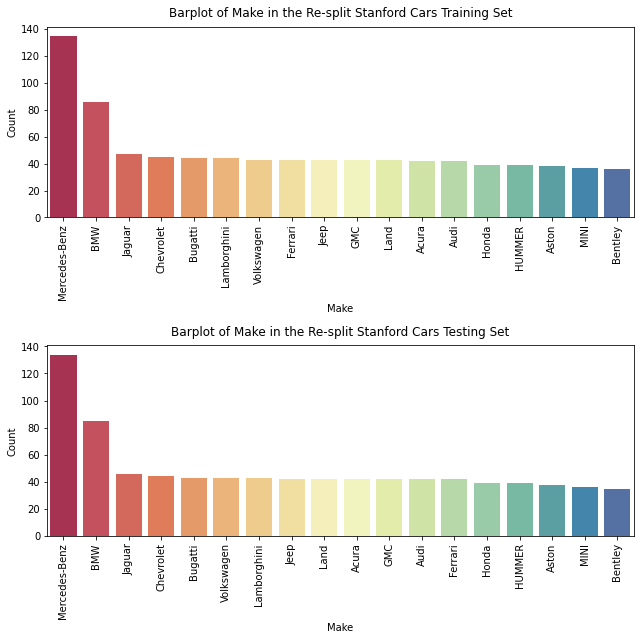

In [22]:
import seaborn as sns

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 9))
plt.subplot(2, 1, 1)

sns.countplot('Make', data = df_train_labels, order = df_train_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Re-split Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)

plt.subplot(2, 1, 2)
sns.countplot('Make', data = df_test_labels, order = df_test_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Re-split Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90), plt.tight_layout()
plt.show()

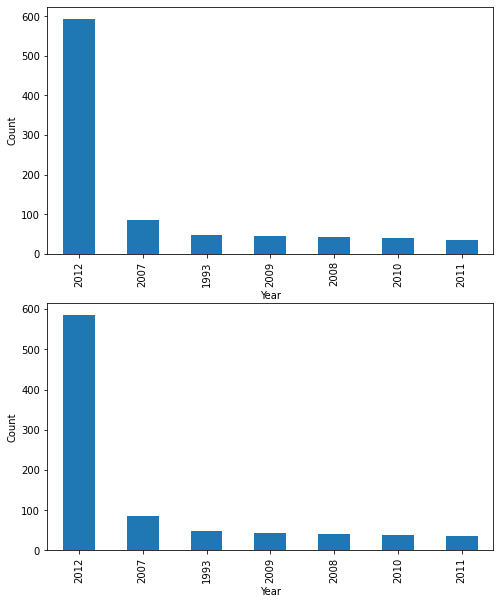

In [23]:
fig = plt.figure(figsize = (8, 10))
plt.subplot(2, 1, 1)
df_train_labels['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')


plt.subplot(2, 1, 2)
df_test_labels['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## CNNs

In [24]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
n_classes = df_train_labels['Cars'].nunique()
batch_size = 32

In [25]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [26]:
## getting the path to the data
train_path = "/content/drive/My Drive/Colab Notebooks/car_data_2/train/"
test_path = "/content/drive/My Drive/Colab Notebooks/car_data_2/test/"

In [27]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 889 images belonging to 21 classes.
Found 877 images belonging to 21 classes.


In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow

In [29]:
## Constructing a CNN with 3 Convolutional layers and two dense layers.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(img_width, img_height,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(21, activation='softmax')
])

## checking the layers of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [30]:
## Linky library

In [31]:
## define optimizer
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

## compile model, define optimizer and the loss function
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
## train the model
history_0 = model.fit_generator(train_generator, 
                           steps_per_epoch=5,
                           validation_data=validation_generator, 
                          validation_steps=5, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 106s 16s/step - loss: 3.2037 - accuracy: 0.0250 - val_loss: 3.1091 - val_accuracy: 0.0812
Epoch 2/10
5/5 [==============================] - 69s 16s/step - loss: 3.0750 - accuracy: 0.0437 - val_loss: 3.1153 - val_accuracy: 0.0312
Epoch 3/10
5/5 [==============================] - 57s 13s/step - loss: 3.0962 - accuracy: 0.0250 - val_loss: 3.0474 - val_accuracy: 0.0812
Epoch 4/10
5/5 [==============================] - 47s 10s/step - loss: 3.0693 - accuracy: 0.0750 - val_loss: 3.0507 - val_accuracy: 0.0688
Epoch 5/10
5/5 [==============================] - 36s 8s/step - loss: 3.0347 - accuracy: 0.0562 - val_loss: 3.0661 - val_accuracy: 0.0688
Epoch 6/10
5/5 [==============================] - 30s 7s/step - loss: 3.0558 - accuracy: 0.0500 - val_loss: 3.0230 - val_accuracy: 0.0625
Epoch 7/10
5/5 [==============================] - 19s 4s/step - loss: 3.0117 - accuracy: 0.0688 - val_loss: 3.0449 - val_accuracy: 0.0625
Epoch 8/10
5/5 [=============

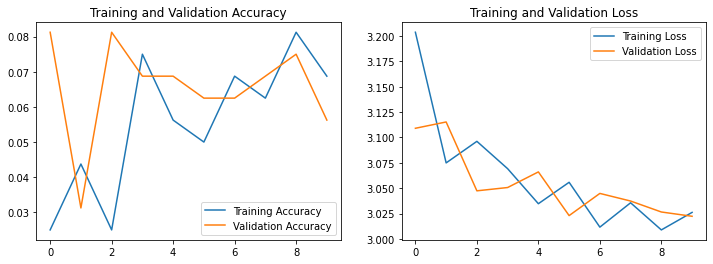

In [35]:
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Transfer Learning**

In [36]:
from tensorflow.keras.applications import MobileNetV2

## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False,
                                    weights='imagenet',
                                    input_shape=(224, 224, 3))


## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu',kernel_regularizer=regularizers.l2(0.01), 
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=21, activation='softmax')(x)

## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

9420800/9406464 [==============================] - 0s 0us/step


In [37]:
## compile the model, define optimizer and the loss function
opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [38]:
## train the model
history_1 = model_1.fit_generator(train_generator, 
                           steps_per_epoch=20,
                           validation_data=validation_generator, 
                          validation_steps=20, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 14.0563 - accuracy: 0.1438 - val_loss: 13.6179 - val_accuracy: 0.1406
Epoch 2/10
20/20 [==============================] - 26s 1s/step - loss: 12.7146 - accuracy: 0.4202 - val_loss: 13.1436 - val_accuracy: 0.3047
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 12.0995 - accuracy: 0.5845 - val_loss: 12.7724 - val_accuracy: 0.4812
Epoch 4/10
20/20 [==============================] - 21s 1s/step - loss: 11.6275 - accuracy: 0.6967 - val_loss: 12.4384 - val_accuracy: 0.5328
Epoch 5/10
20/20 [==============================] - 21s 1s/step - loss: 11.3484 - accuracy: 0.7615 - val_loss: 12.1581 - val_accuracy: 0.5359
Epoch 6/10
20/20 [==============================] - 21s 1s/step - loss: 11.0464 - accuracy: 0.8215 - val_loss: 11.8750 - val_accuracy: 0.5875
Epoch 7/10
20/20 [==============================] - 21s 1s/step - loss: 10.8716 - accuracy: 0.8294 - val_loss: 11.5861 - val_accuracy: 0.6250
Epoch 

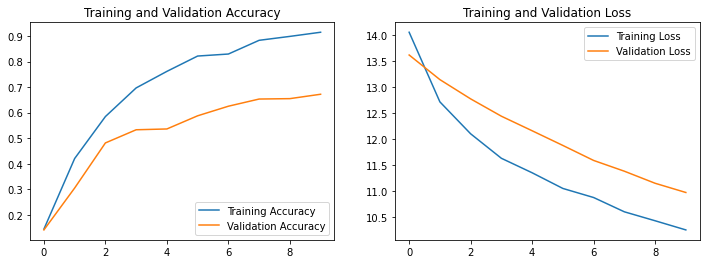

In [39]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0,3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' +\
              'predicted: ' + predicted + ' with probability of: '\
               + str(val_pred)[:4])
        plt.imshow(image)

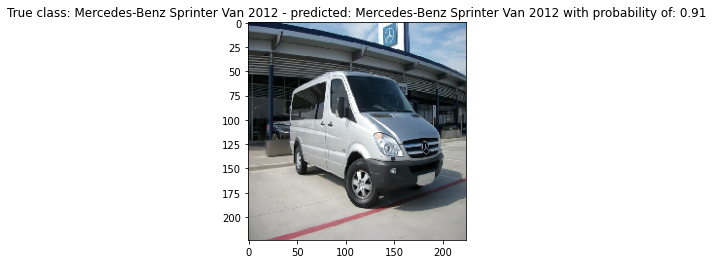

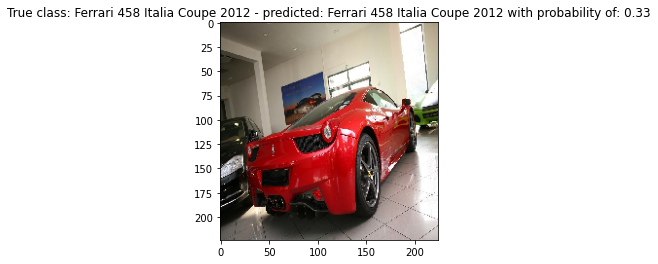

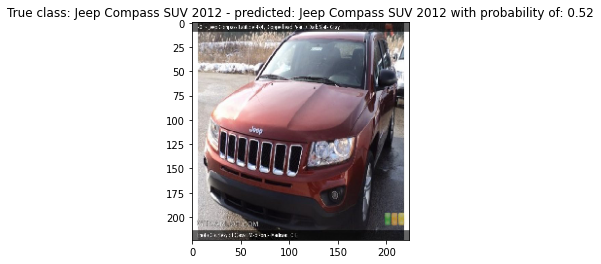

In [46]:
predict_class(model_1)

**VGG16**

In [47]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [49]:
## use pre-trained VGG16 model
## the model was not accepting different image sizes with imagenet weights 
vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))

# mark loaded layers as not trainable
for layer in vgg16_model.layers:
    layer.trainable = False


x = Flatten()(vgg16_model.layers[-1].output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

## define the new model
new_model = Model(inputs=vgg16_model.inputs, outputs=output)
## adding a last layers with only two classes 

In [50]:
## compile model, define optimizer and the loss function
new_model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',metrics=['accuracy'])

In [51]:
new_history = new_model.fit(train_generator, steps_per_epoch=20,
                            validation_data=validation_generator, 
                        validation_steps=20, epochs=10)

Epoch 1/10
20/20 [==============================] - 40s 2s/step - loss: 3.7492 - accuracy: 0.0585 - val_loss: 2.9312 - val_accuracy: 0.0828
Epoch 2/10
20/20 [==============================] - 22s 1s/step - loss: 2.9077 - accuracy: 0.0821 - val_loss: 2.8936 - val_accuracy: 0.1000
Epoch 3/10
20/20 [==============================] - 22s 1s/step - loss: 2.7275 - accuracy: 0.1359 - val_loss: 2.7481 - val_accuracy: 0.1187
Epoch 4/10
20/20 [==============================] - 22s 1s/step - loss: 2.4960 - accuracy: 0.2322 - val_loss: 2.7710 - val_accuracy: 0.1250
Epoch 5/10
20/20 [==============================] - 23s 1s/step - loss: 2.3680 - accuracy: 0.3270 - val_loss: 2.5643 - val_accuracy: 0.2125
Epoch 6/10
20/20 [==============================] - 22s 1s/step - loss: 2.1511 - accuracy: 0.3665 - val_loss: 2.3565 - val_accuracy: 0.2797
Epoch 7/10
20/20 [==============================] - 22s 1s/step - loss: 1.9390 - accuracy: 0.4581 - val_loss: 2.2544 - val_accuracy: 0.3187
Epoch 8/10
20/20 [==

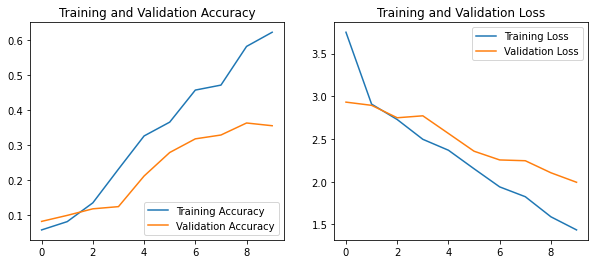

In [53]:
new_acc = new_history.history['accuracy']
new_val_acc = new_history.history['val_accuracy']

new_loss = new_history.history['loss']
new_val_loss = new_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, new_acc, label='Training Accuracy')
plt.plot(epochs_range, new_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, new_loss, label='Training Loss')
plt.plot(epochs_range, new_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Efficent Net**

In [61]:
from tensorflow.keras.applications import efficientnet


In [63]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras import Model, optimizers

## loading the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(21, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
        

27033600/27018416 [==============================] - 0s 0us/step


In [71]:
## compile model, define optimizer and the loss function
opt = tensorflow.keras.optimizers.Adam(lr=0.01)

model_2.compile(loss='categorical_crossentropy', 
                  optimizer=opt ,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
len(validation_generator)

28

In [76]:
## train the model
history_2 = model_2.fit_generator(generator=train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
28/28 [==============================] - 33s 1s/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 2.5681 - val_accuracy: 0.5234
Epoch 2/20
28/28 [==============================] - 33s 1s/step - loss: 0.0364 - accuracy: 0.9865 - val_loss: 1.9837 - val_accuracy: 0.6192
Epoch 3/20
28/28 [==============================] - 33s 1s/step - loss: 0.0312 - accuracy: 0.9910 - val_loss: 2.3396 - val_accuracy: 0.5086
Epoch 4/20
28/28 [==============================] - 32s 1s/step - loss: 0.0213 - accuracy: 0.9966 - val_loss: 2.0470 - val_accuracy: 0.5496
Epoch 5/20
28/28 [==============================] - 32s 1s/step - loss: 0.0221 - accuracy: 0.9966 - val_loss: 1.5609 - val_accuracy: 0.6807
Epoch 6/20
28/28 [==============================] - 32s 1s/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 1.4915 - val_accuracy: 0.7001
Epoch 7/20
28/28 [==============================] - 32s 1s/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 1.3100 - val_accuracy: 0.7548
Epoch 8/20
28/28 [==

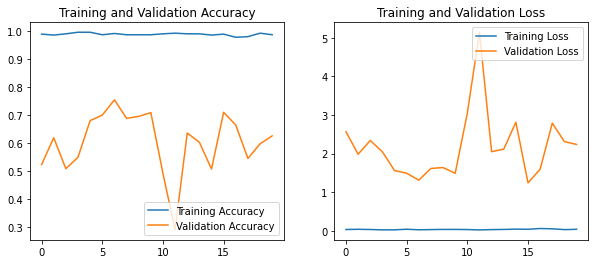

In [77]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

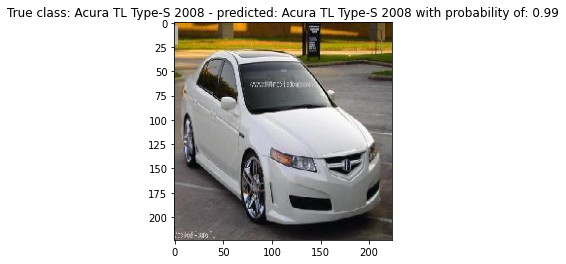

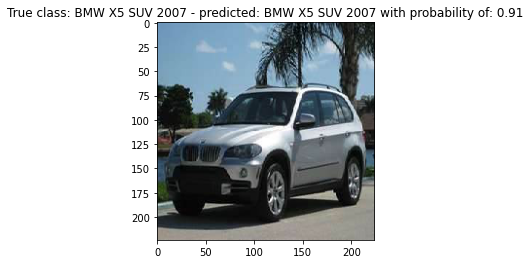

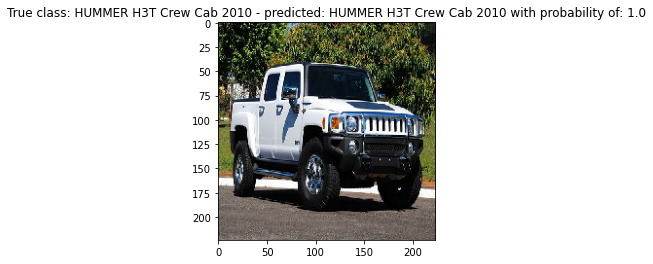

In [78]:
## making prediction about different car models
predict_class(model_2)